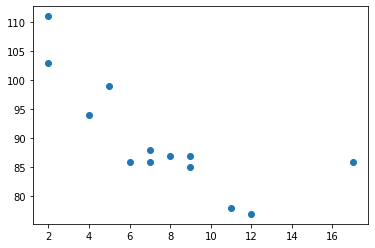

In [1]:
import matplotlib.pyplot as plt 

X=[5,7,8,7,2,17,2,9,4,11,12,9,6]
y=[99,86,87,88,111,86,103,87,94,78,77,85,86]

plt.scatter(X,y)
plt.show()

# Linear Regression 

y= w x +b

In [2]:
def hypothesis(X,w,b):
    y_pred=[]
    for i in range(len(X)):
        y_pred.append(w*X[i]+b)
    return y_pred

def cost_func(y,y_pred):
    cost=0.0
    for i in range(len(y)):
        cost+=float((y[i]-y_pred[i])**2)
    cost=cost/float(len(y))
    return cost 


def calc_gradient_w(y,y_pred,X):
    gradient=0
    for i in range(len(y)):
        gradient+=(y[i]-y_pred[i])*X[i]
    gradient=gradient*2/(len(y))
    return gradient

def calc_gradient_b(y,y_pred):
    gradient=0
    for i in range(len(y)):
        gradient+=(y[i]-y_pred[i])
    gradient=gradient*2/len(y)
    return gradient


def GradientDecsent(X,alpha,y,y_pred,w,b):
    w=w-alpha*calc_gradient_w(y,y_pred,X)
    b=b-alpha*calc_gradient_b(y,y_pred)
    return w,b 


## Training 
# initalize random weights 
w=-2
b=100
for i in range(4):
    y_pred=hypothesis(X,w,b)
    cost1=cost_func(y,y_pred)
    w,b=GradientDecsent(X,0.0001,y,y_pred,w,b)



In [3]:
print(w,b)

-2.0344263262979543 99.99592111414998


In [4]:
def prediction(X):
    y_pred=[]
    for i in range(len(X)):
        y_pred.append(w*X[i]+b)
    return y_pred

In [5]:
y_pred=prediction(X)

In [6]:
cost_func(y,y_pred)

65.4124612588406

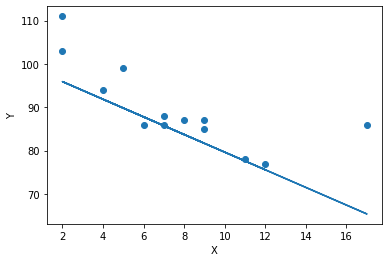

In [7]:
plt.scatter(X,y)
plt.plot(X,y_pred)
plt.xlabel("X")
plt.ylabel('Y')
plt.show()

## Linear Regression with multiple variable

In [8]:
import pandas as pd

In [9]:
data=pd.read_excel('cars.xlsx')
data.head()

,Car,Model,Volume,Weight,CO2
0,Toyota,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [10]:
X=data.iloc[:,2:-1].values     # volume ,weight
y=data.iloc[:,-1].values      #co2

In [11]:
X

array([[1000,  790],
       [1200, 1160],
       [1000,  929],
       [ 900,  865],
       [1500, 1140],
       [1000,  929],
       [1400, 1109],
       [1500, 1365],
       [1500, 1112],
       [1600, 1150],
       [1100,  980],
       [1300,  990],
       [1000, 1112],
       [1600, 1252],
       [1600, 1326],
       [1600, 1330],
       [1600, 1365],
       [2200, 1280],
       [1600, 1119],
       [2000, 1328],
       [1600, 1584],
       [2000, 1428],
       [2100, 1365],
       [1600, 1415],
       [2000, 1415],
       [1500, 1465],
       [2000, 1490],
       [2000, 1725],
       [1600, 1523],
       [2000, 1705],
       [2100, 1605],
       [2000, 1746],
       [1600, 1235],
       [1600, 1390],
       [1600, 1405],
       [2500, 1395]])

In [12]:
from sklearn.linear_model import LinearRegression 
model=LinearRegression()

In [13]:
model.fit(X,y)

LinearRegression()

In [14]:
model.coef_

array([0.00780526, 0.00755095])

In [15]:
model.intercept_

79.69471929115939

In [16]:
prediction=model.predict([[2300,2000]])

In [17]:
prediction

array([112.74870615])

## Boston DataSet 

In [18]:
from sklearn.datasets import load_boston
dataset=load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [19]:
print(dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [20]:
dataset.DESCR.split('\n')

['.. _boston_dataset:',
 '',
 'Boston house prices dataset',
 '---------------------------',
 '',
 '**Data Set Characteristics:**  ',
 '',
 '    :Number of Instances: 506 ',
 '',
 '    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.',
 '',
 '    :Attribute Information (in order):',
 '        - CRIM     per capita crime rate by town',
 '        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.',
 '        - INDUS    proportion of non-retail business acres per town',
 '        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)',
 '        - NOX      nitric oxides concentration (parts per 10 million)',
 '        - RM       average number of rooms per dwelling',
 '        - AGE      proportion of owner-occupied units built prior to 1940',
 '        - DIS      weighted distances to five Boston employment centres',
 '        - RAD      index of accessibility to radial highways

In [21]:
data=pd.DataFrame(data=dataset.data,columns=dataset.feature_names)
data['target']=dataset.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Detect Missing value

In [22]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [24]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [25]:
#split Data to train and test 
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2) #80% train ,20% test 


In [26]:
# define Model 
model=LinearRegression()

In [27]:
#train model
model.fit(train_X,train_y)

LinearRegression()

### Model Evaluation 

In [28]:
y_pred=model.predict(test_X)

In [29]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(y_pred,test_y)
print(error)

17.417425590893675
